<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [6.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/06.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.0 Projects](https://jckantor.github.io/cbe30338-2021/07.00-Projects.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/06.01-Static-Operability.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/06.01-Static-Operability.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 6.1 Static Operability

**Static operability** refers to the ability to operate a system under steady-state conditions. We are primarily interested in determining values for the manipulable inputs that acheive a desired process target, subject to all relevant operating constraints.

### 6.1.1 State Space Model

The state-space model for the Temperature Control Laboratory is given by

\begin{align}
\frac{dx}{dt} & = A x + B_u u + B_d d \\
y & = C x
\end{align}

where the structure of the matrix parameters and vector variables is given by

\begin{align}
\frac{d}{dt}\underbrace{\left[\begin{array}{c} T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2} \end{array}\right]}_x
& = 
\underbrace{\left[\begin{array}{cccc}
-(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} & \frac{U_c}{C^H_p} & 0 \\
\frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p} & 0 & 0 \\
\frac{U_c}{C^H_p} & 0 & -(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} \\
0 & 0 & \frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p}
\end{array}\right]}_A
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
+
\underbrace{\left[\begin{array}{cc}\frac{\alpha P_1}{C_p} & 0 \\ 0 & 0 \\ 0 & \frac{\alpha P_2}{C_p} \\ 0 & 0 \end{array}\right]}_{B_u}
\underbrace{\left[\begin{array}{c}u_1 \\ u_2\end{array}\right]}_u
+
\underbrace{\left[\begin{array}{c}\frac{U_a}{C^H_p} \\ 0 \\ \frac{U_a}{C^H_p} \\ 0 \end{array}\right]}_{B_d}
\underbrace{\left[\begin{array}{c}T_{amb}\end{array}\right]}_{d}
\end{align}

\begin{align}
\underbrace{\left[\begin{array}{c} T_1 \\ T_2 \end{array}\right]}_y
& = 
\underbrace{\left[\begin{array}{cccc} 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{array}\right]}_C
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
\end{align}

## 6.1.1 Steady State Operability

## 6.1.2 Steady State Model

At steady-state our becomes

\begin{align}
0 & = A \bar{x} + B_u\bar{u} + B_d\bar{d} \\
\bar{y} & = C \bar{x} \\
\end{align}

where the overbar $\bar{u}$, $\bar{x}$, and $\bar{y}$ denote the steady-state value of $u$, $x$, and $y$, respectively. We assume $\bar{d}$ is known.

### 6.1.2.1 Steady-State input constraints

The constraints on $\bar{u}$ are given by upper and lower bounds

\begin{align}
0 & \leq \bar{u}_1 \leq 100 \\
0 & \leq \bar{u}_2 \leq 100 
\end{align}

when the values of $u_1$ and $u_2$ correspond to percentage of maximum power. 

### 6.1.2.2 Steady-State output constraints

We will assume there are upper limits for each of the temperature outputs

\begin{align}
\bar{y}_1 & \leq \bar{y}_1^{max} \\
\bar{y}_2 & \leq \bar{y}_2^{max}
\end{align}

when the values of $u_1$ and $u_2$ correspond to percentage of maximum power. 

### 6.1.2.3 Steady-State setpoint targets or ranges

The purpose of control is to find inputs $\bar{u}_1$ and $\bar{u}_2$ that cause the outputs to take on desired values. Those values could be specified as specific setpoints $\bar{r}_1^{SP}$ and $\bar{r}_2^{SP}$ in the form

\begin{align}
\bar{y}_1 & = \bar{r}_1^{SP} \\
\bar{y}_2 & = \bar{r}_2^{SP}
\end{align}

Alternatively, the desired operation could be specified by a range of values

\begin{align}
\bar{r}_1^{min} & \leq \bar{y}_1 \leq \bar{r}_1^{max} \\
\bar{r}_2^{min} & \leq \bar{y}_2 \leq \bar{r}_2^{max}
\end{align}

## 6.1.3 CVXPY Solution

### 6.1.3.1 Imports

In [61]:
import numpy as np
import cvxpy as cp

### 6.1.3.2 Model Parameters

In [90]:
# parameter estimates.
alpha = 0.00016       # watts / (units P * percent U1)
P1 = 200              # P units
P2 = 100              # P units
CpH = 4.46            # heat capacity of the heater (J/deg C)
CpS = 0.819           # heat capacity of the sensor (J/deg C)
Ua = 0.050            # heat transfer coefficient from heater to environment
Ub = 0.021            # heat transfer coefficient from heater to sensor
Uc = 0.0335           # heat transfer coefficient between heaters
Tamb = 22             # ambient room temperature

# state space model
A = np.array([[-(Ua + Ub + Uc)/CpH, Ub/CpH, Uc/CpH, 0], 
              [Ub/CpS, -Ub/CpS, 0, 0],
              [Uc/CpH, 0, -(Ua + Ub + Uc)/CpH, Ub/CpH],
              [0, 0, Ub/CpS, -Ub/CpS]])

Bu = np.array([[alpha*P1/CpH, 0], [0, 0], [0, alpha*P2/CpH], [0, 0]])

Bd = np.array([[Ua/CpH], [0], [Ua/CpH], [0]])

C = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])

# initial values for states and inputs
u_initial = np.array([0, 0])
d_initial = np.array([Tamb])
x_initial = np.array([Tamb, Tamb, Tamb, Tamb])

### 6.1.3.3 CVXPY Model

The following cell implements some, but not all, elements of the steady state analysis as a CVXPY optimization model.

In [91]:
# knowns
d = d_initial            # disturbance
r = np.array([30, 40])   # setpoints

# unknowns to be computed
u = cp.Variable(2)
x = cp.Variable(4)
y = cp.Variable(2)

# objective
objective = cp.Minimize(0)

# model constraints
model_constraints = [
    0 == A@x + Bu@u + Bd@d,
    y == C@x]

# input constraints
input_constraints = [0 <= u, u <= 100]

# output constraints
output_constraints = []

# setpoints
setpoints = []

# solve problem
constraints = model_constraints + input_constraints + output_constraints + setpoints
problem = cp.Problem(objective, constraints)
problem.solve()

# display solution
print(f"u = {u.value}")
print(f"x = {x.value}")
print(f"y = {y.value}")

u = [49.99999587 49.99999708]
x = [49.41880126 49.41880126 42.58119516 42.58119516]
y = [49.41880126 42.58119516]


## 6.1.4 Lab Assigment 7

### 6.1.4.1 Exercise 1.

1. In the cells below, cut and paste the parameter values for matrix coefficients $A$, $B_d$, $B_u$ and $C$ to match those you previously identified for your copy of the Temperature Control Lab.

2. Using the CVXPY outline provided above, write a Python function named `feedforward` that accepts an estimate of $T_{amb}$, and setpoints for $T1$ and $T2$, and returns values for inputs $U1$ and $U2$. The function should constrain inputs U1 and U2 to values between 0 and 100%, constrain all temperatures to values no greater than 60 deg C. Use the the power settings required to set $T1 = 45$ and $T2 = 40$. Then create a simple event loop, and test these values on your hardware. How close was your result to the predicted value?

3. Write an optimization model to find the greatest temperature differential between $T1$ and $T2$ while limiting both to temperatures less than 60 deg C. Verify this prediction using your hardware.

In [98]:
# 1.
# parameter estimates.
alpha = 0.00016       # watts / (units P * percent U1)
P1 = 200              # P units
P2 = 100              # P units
# my device values inserted here
CpH =  8.237             # heat capacity of the heater (J/deg C)
CpS = 1.636              # heat capacity of the sensor (J/deg C)
Ua =  0.0408             # heat transfer coefficient from heater to environment
Ub = 0.0953              # heat transfer coefficient from heater to sensor
Uc = 0.0294              # heat transfer coefficient from heater to sensor
Tamb = 22                # ambient room temperature

# state space model
A = np.array([[-(Ua + Ub + Uc)/CpH, Ub/CpH, Uc/CpH, 0], 
              [Ub/CpS, -Ub/CpS, 0, 0],
              [Uc/CpH, 0, -(Ua + Ub + Uc)/CpH, Ub/CpH],
              [0, 0, Ub/CpS, -Ub/CpS]])

Bu = np.array([[alpha*P1/CpH, 0], [0, 0], [0, alpha*P2/CpH], [0, 0]])

Bd = np.array([[Ua/CpH], [0], [Ua/CpH], [0]])

C = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])

# initial values for states and inputs
u_initial = np.array([0, 0])
d_initial = np.array([Tamb])
x_initial = np.array([Tamb, Tamb, Tamb, Tamb])

print('A=',A)
print('Bu=',Bu)
print('Bd=',Bd)
print('C=',C)

A= [[-0.02009227  0.01156975  0.00356926  0.        ]
 [ 0.05825183 -0.05825183  0.          0.        ]
 [ 0.00356926  0.         -0.02009227  0.01156975]
 [ 0.          0.          0.05825183 -0.05825183]]
Bu= [[0.00388491 0.        ]
 [0.         0.        ]
 [0.         0.00194245]
 [0.         0.        ]]
Bd= [[0.00495326]
 [0.        ]
 [0.00495326]
 [0.        ]]
C= [[0 1 0 0]
 [0 0 0 1]]


In [104]:
# 2. Using the CVXPY outline provided above, write a Python function 
# named feedforward that accepts an estimate of  𝑇𝑎𝑚𝑏 , and setpoints 
# for  𝑇1  and  𝑇2 , and returns values for inputs  𝑈1  and  𝑈2 .

def feedforward(T_amb,SP1,SP2):
    # knowns
    d_initial = np.array([Tamb])
    d = d_initial            # disturbance
    r = np.array([SP1, SP2])   # setpoints

    # unknowns to be computed
    u = cp.Variable(2)
    x = cp.Variable(4)
    y = cp.Variable(2)

    # Set objective
    objective = cp.Minimize(cp.norm(y-r,1))
    
    # model constraints
    model_constraints = [
        0 == A@x + Bu@u + Bd@d,
        y == C@x]

    # input constraints
    input_constraints = [0 <= u, u <= 100]

    # output constraints
    output_constraints = [0 <= x, x <= 60]

    # solve problem
    constraints = model_constraints + input_constraints + output_constraints 
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    # display solution
    print(f"u = {u.value}")
    print(f"x = {x.value}")
    print(f"y = {y.value}")
    
    # Create an array of the heater values
    U = np.zeros(2)
    U[0] = u.value[0]
    U1 = U[0]
    U[1] = u.value[1]
    U2 = U[1]
    
    return U1, U2

In [105]:
# Demonstration
T_amb = 22
SP1 = 45
SP2 = 40
U1,U2=feedforward(T_amb,SP1,SP2)
print('U1=',U1)
print('U2=',U2)

u = [33.91875 36.7125 ]
x = [45. 45. 40. 40.]
y = [45. 40.]
U1= 33.91875000005843
U2= 36.712499998990204


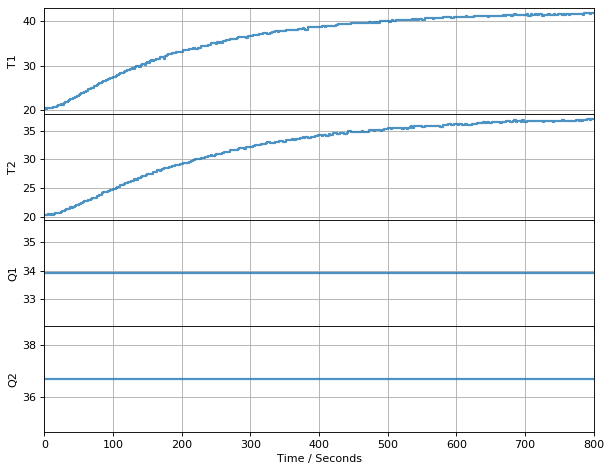

TCLab disconnected successfully.


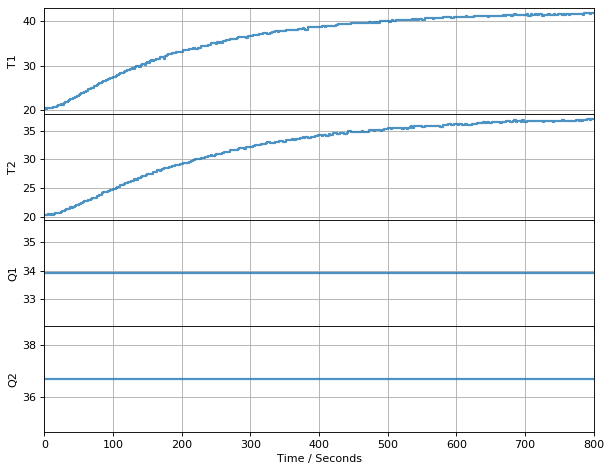

In [74]:
%matplotlib inline
from tclab import TCLab, clock, Historian, Plotter, setup

# Set the parameters
t_final = 800
t_step = 2
T_amb = 21
SP1 = 45
SP2 = 40

# Create the event loop
TCLab = setup(connected=True)
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, t_final)
    for t in clock(t_final, t_step):
        T1 = lab.T1
        T2 = lab.T2
        lab.Q1(U1)
        lab.Q2(U2)
        p.update(t) 

Question: How close was your result to the predicted value?

For T1, my experimental result was reached a slightly lower steady-state temperature than the setpoint temperature - SP1 was set to a value of 45 deg. C and with the heater predictions from the model, my devices T1 value reached approximately 3 degrees lower (42 deg. C.) than the setpoint. T2 experienced a similar result during experimentation - the setpoint SP2 was set to a value of 40 deg. C. and the device's T2 value only reached to approximately 38 deg. C., falling slightly short of the setpoint. Although the temperatures were slightly lower than their setpoints, the heater % power predictions still proved successful - the model does not have perfect accuracy, however, the predictions allowed the sensor temperatures to closely reach the desired responses.

<!--NAVIGATION-->
< [6.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/06.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.0 Projects](https://jckantor.github.io/cbe30338-2021/07.00-Projects.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/06.01-Static-Operability.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/06.01-Static-Operability.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>